   # **Exploratory Data Analysis**
  

Exploratory Data Analysis or (EDA) is an approach of summarizing the data and explaining  the key characterstics of the dataset. It is done using various statistical and visualization methods. This is one of the essential step before modeling the data. It also helps in guiding which model to apply based on how data looks like. There is not one way of doing EDA, it varies from data to data.

**Dataset** - In this project we will be using data of top 5 best selling books each year on Amazon from Year 2009-2019. There are total of 550 books, each having features:- Name of Book, Author Name, User Rating, Reviews, Price, Year, Genre.\
Now we will explore more about data and its characterstics.

***Importing Libraries For EDA*** 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 


***Loading Data Into Dataframe***

In [2]:
df = pd.read_csv("/content/bestsellers with categories.csv")

***Printing Top Five Rows Of Dataset***

If not known much about the datset, this can help us show what are the features in our dataset and what they look like(data type).

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


***Printing the DataTypes of Features Of Dataset***

In [4]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

***Printing Size Of Dataset***

In [5]:
df.shape

(550, 7)

***Removing any Duplicate Rows From the Dataset***

It happens sometimes that while collecting data there may be multiple occurence of the same observation. This affect while modelling the data. That's why it is better to remove them.

In [6]:
df = df.drop_duplicates()
df.count()

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

***Checking If Any of the Rows has Null/NA value***

It might happen sometimes that while collecting data, some observation is incomplete. So it is good to check it before. There several ways of handling missing values. Some are:-\
**1)** To delete that observation.(This is generally used when the ratio of number of observations whose values are missing to total number of observation is small ). For exp - 10 out of 10,000.\
**2)** Replacing it with Mean/Median/Mode(This is generally used when the ratio of number of observations whose values are missing to total number of observation is compartively large).For exp - 10 out of 1000.\
**3)** Predicting the missing values by using some algorithm like Linear Regression etc.

In [7]:
print(df.isnull().sum())
# Here no value is missing Else we would use df.dropna() to remove Null or N/A values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


***Sorting the Data***

This is not the necessary part of the EDA. But in our case it can help us gain valuable insights(As mentioned in the next step) as we know that the years are from 2009-2019 which is in sorted manner.

In [8]:
df =df.sort_values(by=['Year','User Rating'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
364,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11,2009,Fiction
254,Olive Kitteridge,Elizabeth Strout,4.2,4519,12,2009,Fiction
429,The Lost Symbol,Dan Brown,4.2,8747,19,2009,Fiction
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


***Finding The Highest Rated Book Of Each Year (From 2009-2019)***

In [9]:
from collections import defaultdict
Best_per_year = defaultdict(list)
for i in df.index:
    yr = df['Year'][i]
    rat = df['User Rating'][i]
    name = df['Name'][i]
    if Best_per_year[int(yr)]==[]:
      Best_per_year[int(yr)].append(name)
      Best_per_year[int(yr)].append(rat)
    elif Best_per_year[int(yr)][1]<rat:
      Best_per_year[int(yr)][0] = name
      Best_per_year[int(yr)][1] = rat
Best_per_year

defaultdict(list,
            {2009: ['Diary of a Wimpy Kid: The Last Straw (Book 3)', 4.8],
             2010: ['Percy Jackson and the Olympians Paperback Boxed Set (Books 1-3)',
              4.8],
             2011: ['Jesus Calling: Enjoying Peace in His Presence (with Scripture References)',
              4.9],
             2012: ['Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)',
              4.9],
             2013: ['Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)',
              4.9],
             2014: ['Jesus Calling: Enjoying Peace in His Presence (with Scripture References)',
              4.9],
             2015: ['Humans of New York : Stories', 4.9],
             2016: ['Hamilton: The Revolution', 4.9],
             2017: ['Brown Bear, Brown Bear, What Do You See?', 4.9],
             2018: ['Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)',
          

***Finding The Outliers In Data Using Boxplot***

An outlier is a point or set of points that are different from the other points. Their value can be quiet large or quite low relative to the other data points. They can be result from changes in system behaviour, fraudulent behaviour, human error or instrument error. It is important to detect and analyse them because they can result is less accurate model. Here we are using **IQR score technique** to detect and remove outliers and visualizing them with the help of **boxplot**.

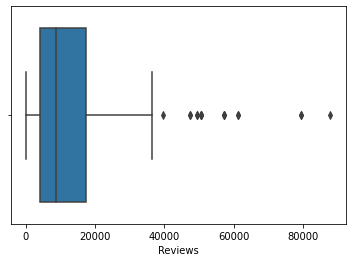

In [10]:
sns.boxplot(x=df["Reviews"])

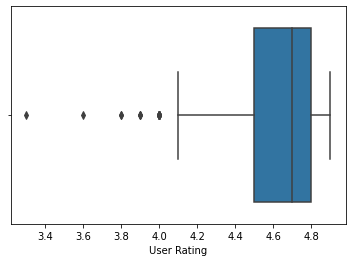

In [11]:
sns.boxplot(x=df["User Rating"])

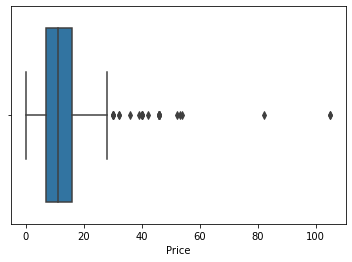

In [12]:
sns.boxplot(x=df["Price"])

**Q1** is the point upto which **25 percent** of the observations has value below or equal to it.\
**Q2** is the point upto which **50 percent** of the observations has value below or equal to it.\
**Q3** is the point upto which **75 percent** of the observations has value below or equal to it.

**IQR = Q3-Q1**. IQR denotes the **middle 50% of the observations** when ordered from lowest to highest.

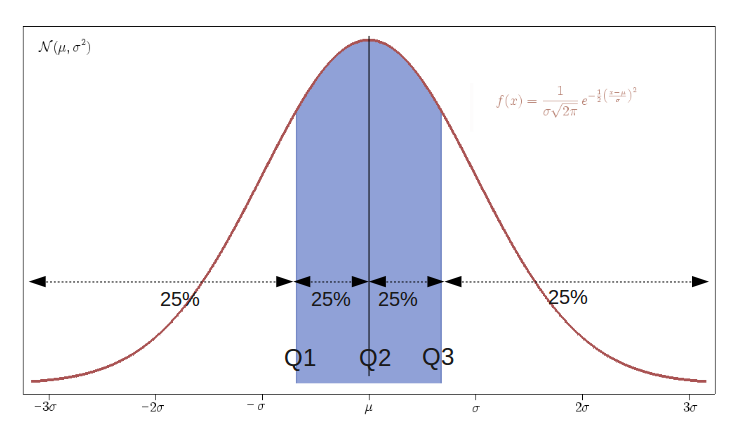

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

User Rating        0.30
Reviews        13195.25
Price              9.00
Year               6.00
dtype: float64


***Removing Outliers***

In [14]:
df = df[~((df<Q1-1.5*IQR)|(df>Q3+1.5*IQR)).any(axis=1)]
df.shape

(486, 7)

Size of Dataset before removing outliers = 550\
Size of Dataset after removing outliers = 486\
No of Outliers = 64

***Scatter Plot***

Scatterplot is generally used to find correlation b/w two variables. Here we have drawn scattterplot of **'Reviews' VS 'User Rating'** and **'Price' VS 'User Rating'**.

Text(0, 0.5, 'Reviews')

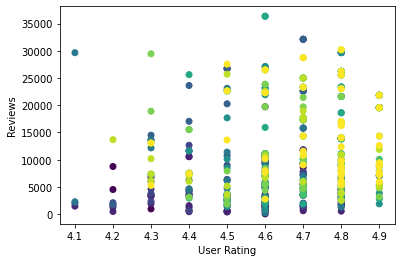

In [15]:
plt.scatter(df['User Rating'],df['Reviews'],c=df['Year'])
plt.xlabel("User Rating")
plt.ylabel('Reviews')

Text(0, 0.5, 'Price')

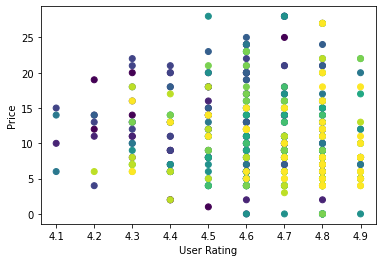

In [16]:
plt.scatter(df['User Rating'],df['Price'],c=df['Year'])
plt.xlabel("User Rating")
plt.ylabel('Price')

**Observations from Scatter Plot:-**\
1) Most of the books have user rating in range 4.2 - 4.9\
2) Most of the books have price in range Rs 3 - Rs 25\
3) Most of the books have reviews in range 1000 - 25000\
4) Both plots Reviews VS User Rating and Price VS User Rating, have approx zero correlation as the points are spread all over the range.


***Heatmap***

HeatMap is use to find dependent variables. It shows magnitude of a phenomenon as color in two dimensions. Here we have have used it to plot correlation b/w different variables. 
For our purpose, we are setting that two variables will be dependent if their correlation is greater or equal to 0.5 .

,User Rating,Reviews,Price,Year
User Rating,1.000000,0.197624,-0.133432,0.275339
Reviews,0.197624,1.000000,-0.154319,0.329294
Price,-0.133432,-0.154319,1.000000,-0.182557
Year,0.275339,0.329294,-0.182557,1.000000


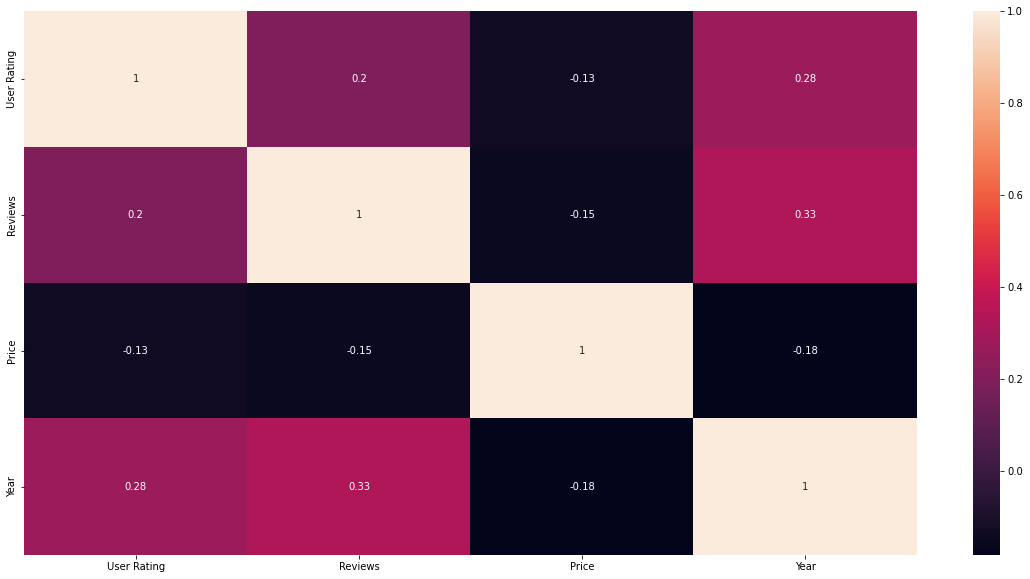

In [17]:
plt.figure(figsize = (20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

From the plot we can see that the correlation values b/w any two different variables are less than 0.5. Therefore all variables are independent of each-other.